# ELECTROLAND LIMITED
### ANALYSIS OF SALES & PURCHASE ORDERS
### Blankson Paa Kwesi, Data Analyst



In [84]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [8]:
# Import libraries

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import numpy as np 


#### 1. Merging All 12 Monthly CSV Sales Data into a 1 file   

In [9]:
# Lets see how one of the 12 lines up

df = pd.read_csv(r"A:\PROJECTS\PYTHON_ARENA\Electroland_2019_Sales_Data_Analysis using Pandas\SalesAnalysis\Sales_Data\Sales_April_2019.csv")
df.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"


In [10]:

#Create a folder path
data_file_folder = r"A:\PROJECTS\PYTHON_ARENA\Electroland_2019_Sales_Data_Analysis using Pandas\SalesAnalysis\Sales_Data"

#Create an empty list
df = [] 
for file in os.listdir(data_file_folder):
    if file.endswith(".csv"): # If file extension ends with .csv, 
        print("Loading file {0}...".format(file)) #Then print loading file given the file name.format which returns file name
        df.append(pd.read_csv(os.path.join(data_file_folder, file))) # Load the dataframe library using pd.read and provide a file path, data file folder concatenated with the file name. Append all as Dataframe object using df.append() method 
        


Loading file Sales_April_2019.csv...
Loading file Sales_August_2019.csv...
Loading file Sales_December_2019.csv...
Loading file Sales_February_2019.csv...
Loading file Sales_January_2019.csv...
Loading file Sales_July_2019.csv...
Loading file Sales_June_2019.csv...
Loading file Sales_March_2019.csv...
Loading file Sales_May_2019.csv...
Loading file Sales_November_2019.csv...
Loading file Sales_October_2019.csv...
Loading file Sales_September_2019.csv...


In [11]:
len(df) #Lets see number of files in our folder

12

In [12]:
#Merging all Dataframe objects into a single table

df_master = pd.concat(df, axis=0) #we want to merge the records vertically so we set axis to 0 which is the default.
df_master.to_csv("master file.csv", index=False) # Recreate csv file using to_csv method and name it master file. index is False because we dont want to save the first index values

# The above creates a new master file in the project folder which is a merge of all our 12 months folders.
df_master.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### 2. Data Cleaning

#### Dropping null values

In [13]:
#lets see where the null values are 
df_master[df_master.isna().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
10012,NaN,NaN,NaN,NaN,NaN,NaN
10274,NaN,NaN,NaN,NaN,NaN,NaN
10878,NaN,NaN,NaN,NaN,NaN,NaN
11384,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Lets Drop records with null values....
df_master_clean = df_master.dropna()
df_master_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### 3. Create a new column for month 

#### Identifying and deleting ValueError: invalid literal for int() with base 10: 'Or' 

In [15]:
t_df = df_master_clean[df_master_clean["Order Date"].str[0:2]=="Or"]
t_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [16]:
df_master_clean = df_master_clean[df_master_clean["Order Date"].str[0:2] !="Or"]

In [17]:
df_master_clean["Month"] = df_master_clean["Order Date"].str[0:2] #Convert Order date to string and include only the first 2 elements
df_master_clean["Month"] = df_master_clean["Month"].astype("int32")
df_master_clean  = df_master_clean.sort_values(by=["Month"])

Month = range(1,13)

df_master_clean.head() #ValueError: invalid literal for int() with base 10: 'Or'

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
1850,142996,AAA Batteries (4-pack),1,2.99,01/01/19 21:01,"402 Chestnut St, Boston, MA 02215",1
3226,144300,Apple Airpods Headphones,1,150,01/11/19 14:22,"532 River St, San Francisco, CA 94016",1
3225,144299,27in 4K Gaming Monitor,1,389.99,01/31/19 19:57,"942 North St, San Francisco, CA 94016",1
3224,144298,Lightning Charging Cable,1,14.95,01/13/19 12:00,"709 North St, Los Angeles, CA 90001",1
3223,144297,Flatscreen TV,1,300,01/21/19 14:37,"437 Madison St, Atlanta, GA 30301",1


#### Replace Month numbers with actual month names

In [18]:
df_master_clean["Month_Name"]=df_master_clean["Month"].replace([1, 2, 3,4,5,6,7,8,9,10,11,12], ["January", "February","March",
                                                                                      "April", "May", "June", "July", 
                                                                                             "August", "September", "October",
                                                                                            "November", "December"])

In [19]:
df_master_clean

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month_Name
1850,142996,AAA Batteries (4-pack),1,2.99,01/01/19 21:01,"402 Chestnut St, Boston, MA 02215",1,January
3226,144300,Apple Airpods Headphones,1,150,01/11/19 14:22,"532 River St, San Francisco, CA 94016",1,January
3225,144299,27in 4K Gaming Monitor,1,389.99,01/31/19 19:57,"942 North St, San Francisco, CA 94016",1,January
3224,144298,Lightning Charging Cable,1,14.95,01/13/19 12:00,"709 North St, Los Angeles, CA 90001",1,January
3223,144297,Flatscreen TV,1,300,01/21/19 14:37,"437 Madison St, Atlanta, GA 30301",1,January
...,...,...,...,...,...,...,...,...
16768,311693,27in FHD Monitor,1,149.99,12/06/19 18:05,"594 9th St, Dallas, TX 75001",12,December
16769,311694,AAA Batteries (4-pack),1,2.99,12/19/19 07:35,"905 11th St, Atlanta, GA 30301",12,December
16770,311695,Wired Headphones,1,11.99,12/21/19 21:06,"107 Lakeview St, San Francisco, CA 94016",12,December
16748,311673,USB-C Charging Cable,1,11.95,12/26/19 22:24,"169 Forest St, San Francisco, CA 94016",12,December


### 4. Generating revenue column for each record

#### Convert price and quantity from string to numeric

In [20]:
df_master_clean["Quantity Ordered"] = pd.to_numeric(df_master_clean["Quantity Ordered"]) # converts quantity from string to int 
df_master_clean["Price Each"] = pd.to_numeric(df_master_clean["Price Each"]) # converts quantity from string to int 


In [21]:
df_master_clean['Revenue'] = df_master_clean["Price Each"] * df_master_clean["Quantity Ordered"]
df_master_clean.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month_Name,Revenue
16768,311693,27in FHD Monitor,1,149.99,12/06/19 18:05,"594 9th St, Dallas, TX 75001",12,December,149.99
16769,311694,AAA Batteries (4-pack),1,2.99,12/19/19 07:35,"905 11th St, Atlanta, GA 30301",12,December,2.99
16770,311695,Wired Headphones,1,11.99,12/21/19 21:06,"107 Lakeview St, San Francisco, CA 94016",12,December,11.99
16748,311673,USB-C Charging Cable,1,11.95,12/26/19 22:24,"169 Forest St, San Francisco, CA 94016",12,December,11.95
13116,308183,Lightning Charging Cable,1,14.95,12/11/19 13:25,"270 8th St, Los Angeles, CA 90001",12,December,14.95


### 5. Generating city column (split and lambda)

In [22]:
#Here we use .apply() and split purchase address 

def get_city(address):
    return address.split(",")[1]


df_master_clean["City"] = df_master_clean["Purchase Address"].apply(lambda x: get_city(x))
df_master_clean.head()

#Alternatively we can create a function to retrieve the city from address like below:


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month_Name,Revenue,City
1850,142996,AAA Batteries (4-pack),1,2.99,01/01/19 21:01,"402 Chestnut St, Boston, MA 02215",1,January,2.99,Boston
3226,144300,Apple Airpods Headphones,1,150.00,01/11/19 14:22,"532 River St, San Francisco, CA 94016",1,January,150.00,San Francisco
3225,144299,27in 4K Gaming Monitor,1,389.99,01/31/19 19:57,"942 North St, San Francisco, CA 94016",1,January,389.99,San Francisco
3224,144298,Lightning Charging Cable,1,14.95,01/13/19 12:00,"709 North St, Los Angeles, CA 90001",1,January,14.95,Los Angeles
3223,144297,Flatscreen TV,1,300.00,01/21/19 14:37,"437 Madison St, Atlanta, GA 30301",1,January,300.00,Atlanta


### 6. Generating State column by creating a get_state function

In [23]:
def get_state(address):
    return address.split(",")[2].split(" ")[1] #split by comma and index 2, and split further by whitespace for 0th index 

df_master_clean["State"] = df_master_clean["Purchase Address"].apply(lambda x: get_state(x))
df_master_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month_Name,Revenue,City,State
1850,142996,AAA Batteries (4-pack),1,2.99,01/01/19 21:01,"402 Chestnut St, Boston, MA 02215",1,January,2.99,Boston,MA
3226,144300,Apple Airpods Headphones,1,150.00,01/11/19 14:22,"532 River St, San Francisco, CA 94016",1,January,150.00,San Francisco,CA
3225,144299,27in 4K Gaming Monitor,1,389.99,01/31/19 19:57,"942 North St, San Francisco, CA 94016",1,January,389.99,San Francisco,CA
3224,144298,Lightning Charging Cable,1,14.95,01/13/19 12:00,"709 North St, Los Angeles, CA 90001",1,January,14.95,Los Angeles,CA
3223,144297,Flatscreen TV,1,300.00,01/21/19 14:37,"437 Madison St, Atlanta, GA 30301",1,January,300.00,Atlanta,GA


## EDA

## REVENUE ANALYSIS

### Identifying months with highest revenue

<b>December recorded the highest revenue with approximately US 4.6 Million, whilst January recorded the lowest revenue at approximately US 1.8 Million.</b>

C:\Users\pkbla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


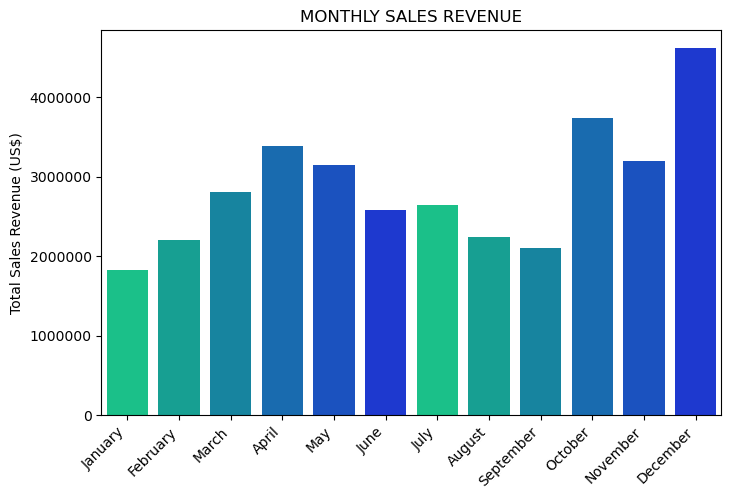

In [24]:
x=["January", 'February', "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
y = df_master_clean.groupby("Month")["Revenue"].sum()

plt.figure(figsize=(8, 5))
chart = sns.barplot(x, y, palette=sns.color_palette("winter_r"))
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.ticklabel_format(style='plain', axis='y') #Repress scientific notation
#specify axis labels
plt.xlabel('')
plt.ylabel('Total Sales Revenue (US$)')
plt.title('MONTHLY SALES REVENUE')

#display barplot
plt.show()

<b>Macbook Pro Laptop generated the highest revenue of ~US8.0 million followed by iPhone and ThinkPad laptop with approximately US4.8 million and US4.1 million respectively. </b>

In [25]:
product_rev = df_master_clean.groupby(["Product"])["Revenue"].sum().sort_values(ascending=False).reset_index()

product_rev["%_tage"]=round(product_rev["Revenue"]*100/ product_rev["Revenue"].sum(), 2)

product_rev.head()

,Product,Revenue,%_tage
0,Macbook Pro Laptop,8037600.00,23.30
1,iPhone,4794300.00,13.90
2,ThinkPad Laptop,4129958.70,11.97
3,Google Phone,3319200.00,9.62
4,27in 4K Gaming Monitor,2435097.56,7.06


C:\Users\pkbla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


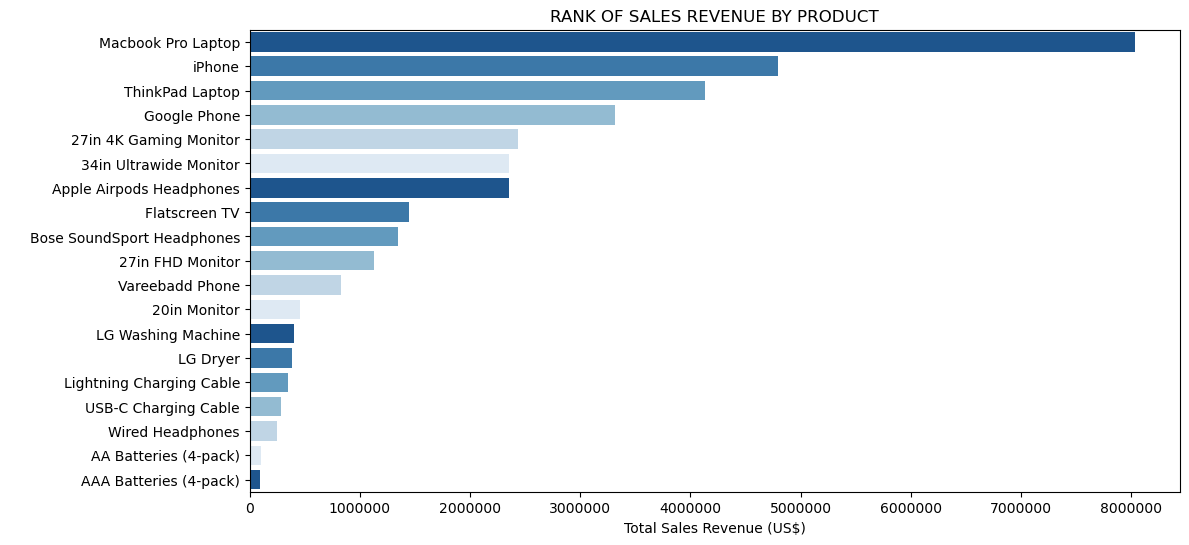

In [26]:
y= pd.DataFrame(df_master_clean.groupby("Product")["Revenue"].sum()).sort_values(by="Revenue", ascending= False).reset_index("Product")
y_ = y.set_index("Product")
y_

plt.figure(figsize=(12, 6))
chart = sns.barplot(y_["Revenue"], y_.index, palette=sns.color_palette("Blues_r"))
plt.ticklabel_format(style='plain', axis='x') #Repress scientific notation
#specify axis labels
plt.ylabel(' ')
plt.xlabel('Total Sales Revenue (US$)')
plt.title('RANK OF SALES REVENUE BY PRODUCT')

#display barplot
plt.show()

### Products Sold the most 

<b> Items with the least prices are sold the most but generate the least amount of revenue whilst the opposite is true for items with higher prices. For example Macbook Pro generates the most revenue but units sold is approximately 4700 pieces with an average price of US$ 1700. Also, USB Charging cable is the most sold product but one of the least revenue generating product.</b>

In [27]:

#Creating a new series
product_count = df_master_clean.groupby(["Product"])["Quantity Ordered"].count().sort_values(ascending=False).reset_index()

#product_rev = product_rev.shift()[1:] #start index from 1
product_count["%_tage"]=round(product_count["Quantity Ordered"]*100/ product_count["Quantity Ordered"].sum(), 2)


product_count.head()

,Product,Quantity Ordered,%_tage
0,USB-C Charging Cable,21903,11.78
1,Lightning Charging Cable,21658,11.65
2,AAA Batteries (4-pack),20641,11.10
3,AA Batteries (4-pack),20577,11.07
4,Wired Headphones,18882,10.15


In [28]:
av_prices = df_master_clean.groupby(["Product"])["Price Each"].mean().reset_index()
av_prices.head()

,Product,Price Each
0,20in Monitor,109.99
1,27in 4K Gaming Monitor,389.99
2,27in FHD Monitor,149.99
3,34in Ultrawide Monitor,379.99
4,AA Batteries (4-pack),3.84


In [29]:
# merging/ Joining the 2 tables above..... 

join = pd.merge(product_count, av_prices, how="inner", on = "Product")
join.head()

,Product,Quantity Ordered,%_tage,Price Each
0,USB-C Charging Cable,21903,11.78,11.95
1,Lightning Charging Cable,21658,11.65,14.95
2,AAA Batteries (4-pack),20641,11.10,2.99
3,AA Batteries (4-pack),20577,11.07,3.84
4,Wired Headphones,18882,10.15,11.99


C:\Users\pkbla\AppData\Local\Temp\ipykernel_17892\857870294.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(join.Product, rotation='vertical', size=8)
C:\Users\pkbla\AppData\Local\Temp\ipykernel_17892\857870294.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


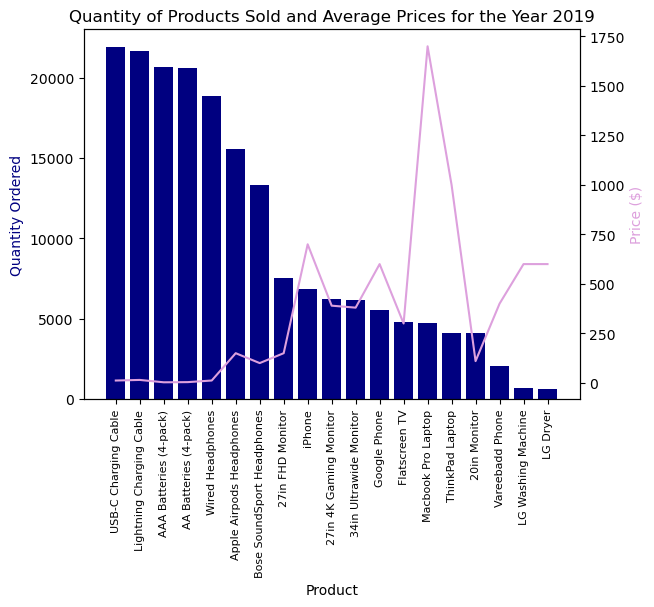

In [30]:
#Creating a  Combo Chart 
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(join.Product, join["Quantity Ordered"], color='navy')
ax2.plot(join.Product, join["Price Each"], color='plum')

ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered', color='navy')
ax2.set_ylabel('Price ($)', color='plum')
ax1.set_xticklabels(join.Product, rotation='vertical', size=8)
ax1.set_title("Quantity of Products Sold and Average Prices for the Year 2019")
fig.show()

<b>San Francisco and Los Angeles all in California State generated the highest revenue for the Company with ~US8.3 million and ~US5.4 million respectively.</b>

In [31]:
city_rev  = df_master_clean.groupby(["City", "State"])["Revenue"].sum().sort_values(ascending=False).reset_index()
city_rev["%_tage"]=round(city_rev["Revenue"]*100/ city_rev["Revenue"].sum(), 2)


city_rev

,City,State,Revenue,%_tage
0,San Francisco,CA,8262203.91,23.95
1,Los Angeles,CA,5452570.80,15.81
2,New York City,NY,4664317.43,13.52
3,Boston,MA,3661642.01,10.62
4,Atlanta,GA,2795498.58,8.10
5,Dallas,TX,2767975.40,8.02
6,Seattle,WA,2747755.48,7.97
7,Portland,OR,1870732.34,5.42
8,Austin,TX,1819581.75,5.28
9,Portland,ME,449758.27,1.30


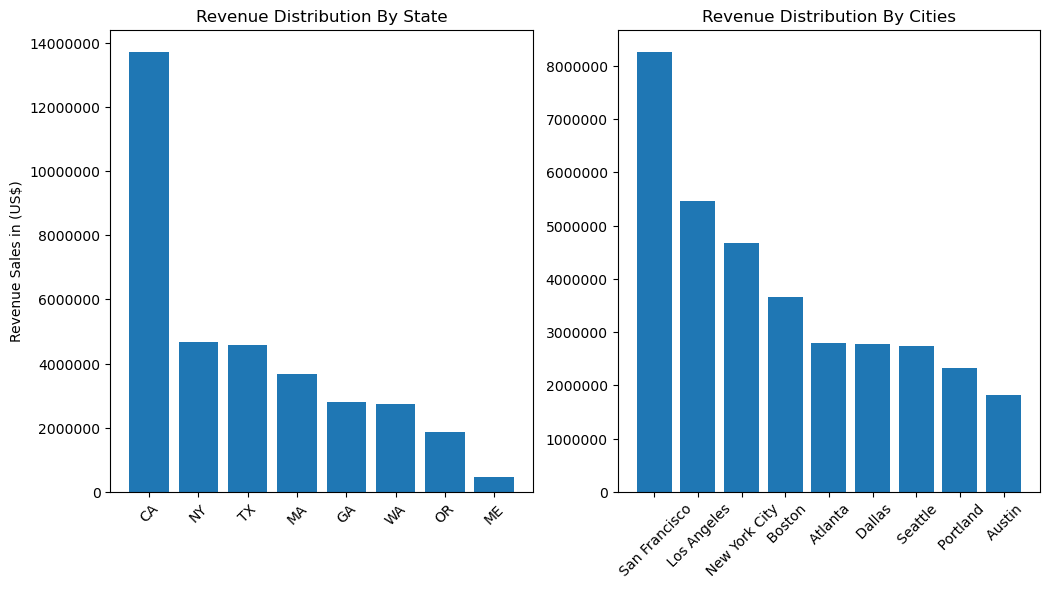

In [32]:
plt.figure(figsize = (12,6))

tmp_df_s = df_master_clean.groupby("State")["Revenue"].sum().sort_values(ascending = False).reset_index()

plt.subplot(1,2,1) #I want 1 Row, with 2 Columns. This Chart will be position1. 
plt.bar(x=tmp_df_s["State"], height=tmp_df_s['Revenue'])
plt.xticks(rotation=45)
plt.ylabel("Revenue Sales in (US$)")
plt.ticklabel_format(style='plain', axis='y')
plt.title("Revenue Distribution By State")


tmp_df_c = df_master_clean.groupby("City")["Revenue"].sum().sort_values(ascending = False).reset_index()
plt.subplot(1,2,2)
plt.bar(x=tmp_df_c["City"], height=tmp_df_c['Revenue'])
plt.xticks(rotation=45)
plt.title("Revenue Distribution By Cities")
plt.ticklabel_format(style='plain', axis='y')
plt.show()



# DateTime Analysis

<b>Purchase Orders are mostly low in the mornings, specifically beween 12am and 8am. However, Purchases Order is mostly high between 11am to 2pm  and between 6pm and 10pm.</b>

#### Lets convert Order Date which is string in the DataFrame to python pandas datetime

In [33]:
df_master_clean["Order Date"] = pd.to_datetime(df_master_clean["Order Date"]) #converting string to date 

In [34]:
df_master_clean.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month_Name,Revenue,City,State
1850,142996,AAA Batteries (4-pack),1,2.99,2019-01-01 21:01:00,"402 Chestnut St, Boston, MA 02215",1,January,2.99,Boston,MA
3226,144300,Apple Airpods Headphones,1,150.00,2019-01-11 14:22:00,"532 River St, San Francisco, CA 94016",1,January,150.00,San Francisco,CA
3225,144299,27in 4K Gaming Monitor,1,389.99,2019-01-31 19:57:00,"942 North St, San Francisco, CA 94016",1,January,389.99,San Francisco,CA


#### Creating new Hour and Minutes columns 

In [35]:
df_master_clean["Hour"] = df_master_clean["Order Date"].dt.hour
df_master_clean["Minute"] = df_master_clean["Order Date"].dt.minute
df_master_clean.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month_Name,Revenue,City,State,Hour,Minute
1850,142996,AAA Batteries (4-pack),1,2.99,2019-01-01 21:01:00,"402 Chestnut St, Boston, MA 02215",1,January,2.99,Boston,MA,21,1
3226,144300,Apple Airpods Headphones,1,150.00,2019-01-11 14:22:00,"532 River St, San Francisco, CA 94016",1,January,150.00,San Francisco,CA,14,22
3225,144299,27in 4K Gaming Monitor,1,389.99,2019-01-31 19:57:00,"942 North St, San Francisco, CA 94016",1,January,389.99,San Francisco,CA,19,57


In [36]:
df_master_clean["State"].unique()

array(['MA', 'CA', 'GA', 'NY', 'TX', 'WA', 'OR', 'ME'], dtype=object)

In [37]:
#Creating different DataFrames based on State

df_MA = df_master_clean[df_master_clean["State"] == "MA"]
df_CA = df_master_clean[df_master_clean["State"] == "CA"]
df_NY = df_master_clean[df_master_clean["State"] == "NY"]
df_TX = df_master_clean[df_master_clean["State"] == "TX"]
df_OR = df_master_clean[df_master_clean["State"] == "OR"]
df_WA = df_master_clean[df_master_clean["State"] == "WA"]
df_ME = df_master_clean[df_master_clean["State"] == "ME"]
df_GA = df_master_clean[df_master_clean["State"] == "GA"]

In [38]:
hours = [hour for hour, df in df_master_clean.groupby("Hour")]
minutes = [minute for minute, df in df_master_clean.groupby("Minute")]
#df_master_clean.groupby("Hour")["Revenue"].count().reset_index()

In [39]:
tab2 = pd.crosstab(df_master_clean.Minute, df_master_clean.Hour ,margins=False)
#tab2["pct_all"] = round((tab2["All"]/ (first_timer_df["Deposit_Type"].count())*100),2)
#tab2.style.background_gradient(cmap="RdYlGn")

tab2 = tab2.sort_values(by="Minute", ascending=False)

<AxesSubplot:xlabel='Hour', ylabel='Minute'>

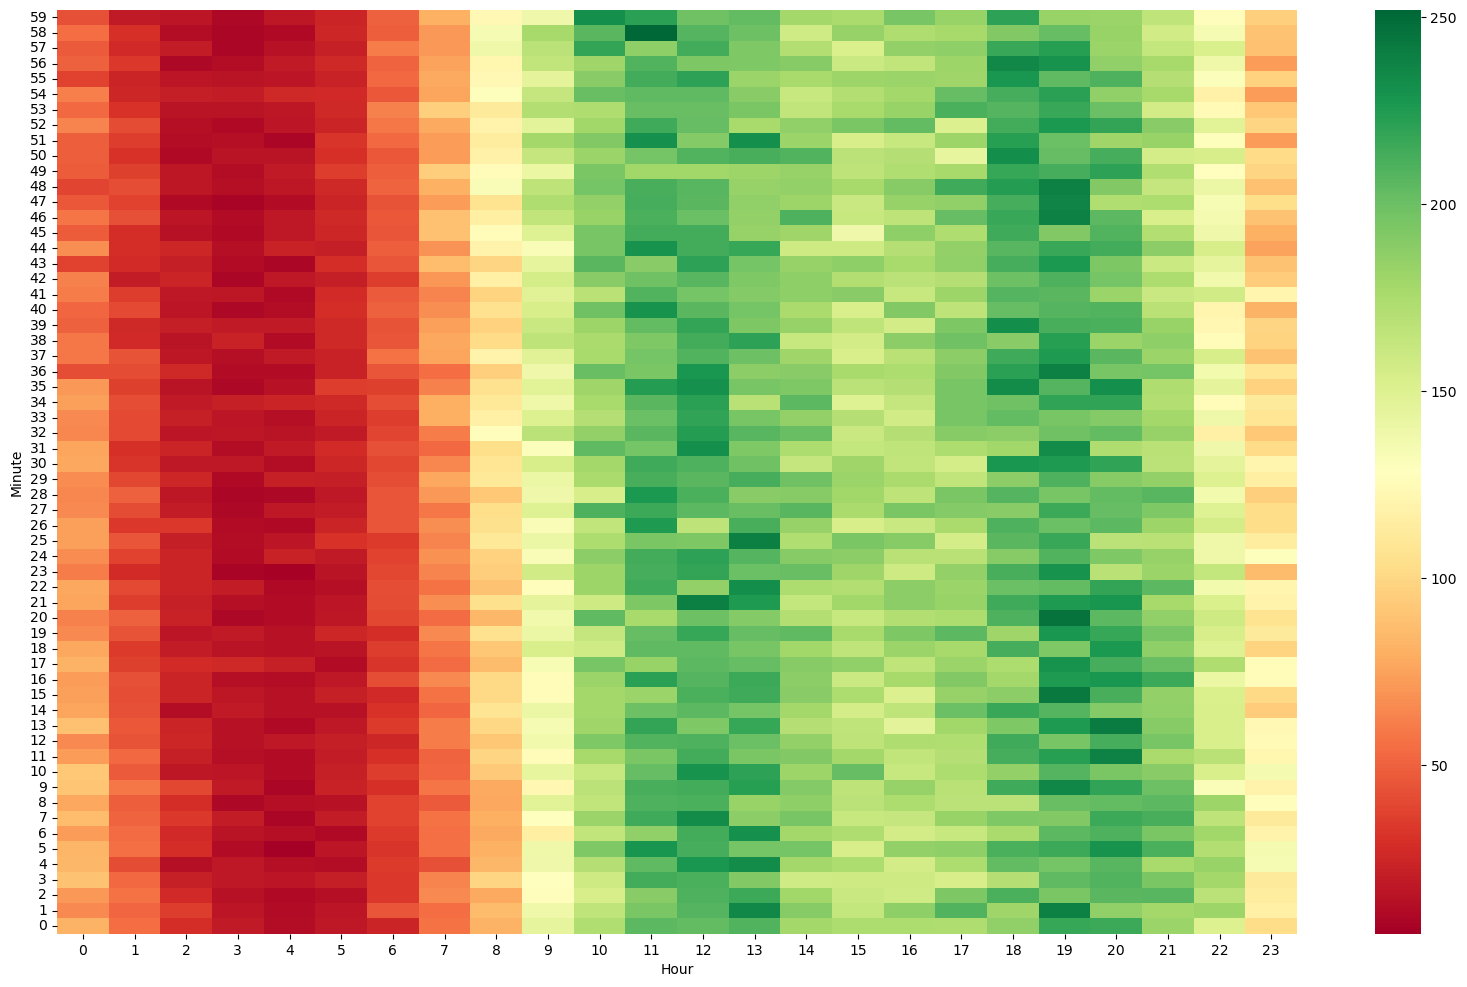

In [40]:
plt.figure(figsize=(20,12))

heat = sns.heatmap(tab2, annot = False, cmap="RdYlGn")
heat
#plt.tight_layout()


<b>Purchases reaches its highest peak in California, which is the highest revenue driver by State at 19hours or 7pm in the evenings. Total purchase orders for the State went above 5000 orders while Maine is the State with the least amount of orders.</b>

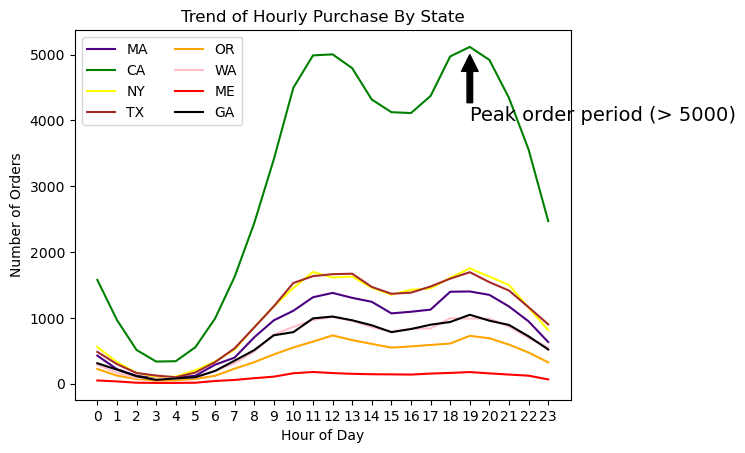

In [41]:

fig, ax=plt.subplots()

hours = [hour for hour, df in df_master_clean.groupby("Hour")] #Creates a series of Hours (0-23)


#l1=ax.plot(hours, df_master_clean.groupby("Hour").count(), label="All" ) # Creates a plot of hours(0-23) on x-axis and count of each hour on y-axis
l2=ax.plot(hours, df_MA.groupby("Hour")["Order ID"].count(), color ="indigo", label="MA") # Creates a plot of hours(0-23) on x-axis and count of each hour on y-axis
l3=ax.plot(hours, df_CA.groupby("Hour")["Order ID"].count(), color="green", label="CA") # Creates a plot of hours(0-23) on x-axis and count of each hour on y-axis
l4=ax.plot(hours, df_NY.groupby("Hour")["Order ID"].count(), color="yellow", label="NY") # Creates a plot of hours(0-23) on x-axis and count of each hour on y-axis
l5=ax.plot(hours, df_TX.groupby("Hour")["Order ID"].count(), color = "brown", label="TX") # Creates a plot of hours(0-23) on x-axis and count of each hour on y-axis
l6=ax.plot(hours, df_OR.groupby("Hour")["Order ID"].count(), color="orange", label="OR") # Creates a plot of hours(0-23) on x-axis and count of each hour on y-axis
l7=ax.plot(hours, df_WA.groupby("Hour")["Order ID"].count(), color= "pink", label="WA") # Creates a plot of hours(0-23) on x-axis and count of each hour on y-axis
l8=ax.plot(hours, df_ME.groupby("Hour")["Order ID"].count(), color="red",label="ME") # Creates a plot of hours(0-23) on x-axis and count of each hour on y-axis
l9=ax.plot(hours, df_GA.groupby("Hour")["Order ID"].count(), color="black", label="GA") # Creates a plot of hours(0-23) on x-axis and count of each hour on y-axis


plt.xlabel("Hour of Day")
plt.ylabel("Number of Orders")
plt.title("Trend of Hourly Purchase By State")
plt.xticks(hours)
ax.annotate("Peak order period (> 5000)", color = "black", xy=(19,5000),
                fontsize= 14, xytext = (19, 4000), arrowprops = dict(facecolor = "BLACK"))
#ax.grid()
plt.legend(ncol=2, loc="upper left")
plt.show()


<b> More than 30% of the orders for the year came from two(2) cities, San Francisco and Los Angeles all in California whiles Portland in Maine recorded the least amount of orders for the year at ~1.3% (i.e. 2,455 orders).</b>

In [42]:
df_order_count = df_master_clean.groupby(["City", "State"])["Revenue"].count().sort_values(ascending=False).reset_index()
df_order_count= df_order_count.rename(columns = {'Revenue':'Order_Count'})

df_order_count["%_tage"]=round(df_order_count["Order_Count"]*100/ df_order_count["Order_Count"].sum(), 2)

df_order_count

,City,State,Order_Count,%_tage
0,San Francisco,CA,44732,24.06
1,Los Angeles,CA,29605,15.92
2,New York City,NY,24876,13.38
3,Boston,MA,19934,10.72
4,Atlanta,GA,14881,8.00
5,Dallas,TX,14820,7.97
6,Seattle,WA,14732,7.92
7,Portland,OR,10010,5.38
8,Austin,TX,9905,5.33
9,Portland,ME,2455,1.32


<b>Items most sold together </b>

In [43]:
#If items purchased have the same order id, it means they were purchased together.

compliment_df = df_master_clean[df_master_clean["Order ID"].duplicated(keep=False)] #checks all cells in order id column and see which ones are duplicated. Keep = False keeps everything.

#Lets create a new column in the compliment_df called grouped that has duplicate products on the same line.

compliment_df["Grouped"] = compliment_df.groupby("Order ID")["Product"].transform(lambda x:",".join(x)) # For every all order ids grouped by products, for each one of x we want to join them by comma

compliment_df.head()


C:\Users\pkbla\AppData\Local\Temp\ipykernel_17892\1202720636.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compliment_df["Grouped"] = compliment_df.groupby("Order ID")["Product"].transform(lambda x:",".join(x)) # For every all order ids grouped by products, for each one of x we want to join them by comma


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month_Name,Revenue,City,State,Hour,Minute,Grouped
3197,144271,Lightning Charging Cable,1,14.95,2019-01-28 23:02:00,"2 Cherry St, San Francisco, CA 94016",1,January,14.95,San Francisco,CA,23,2,"Lightning Charging Cable,iPhone"
3196,144271,iPhone,1,700.00,2019-01-28 23:02:00,"2 Cherry St, San Francisco, CA 94016",1,January,700.00,San Francisco,CA,23,2,"Lightning Charging Cable,iPhone"
3266,144339,iPhone,1,700.00,2019-01-21 14:33:00,"953 Hickory St, Los Angeles, CA 90001",1,January,700.00,Los Angeles,CA,14,33,"iPhone,Wired Headphones"
3267,144339,Wired Headphones,1,11.99,2019-01-21 14:33:00,"953 Hickory St, Los Angeles, CA 90001",1,January,11.99,Los Angeles,CA,14,33,"iPhone,Wired Headphones"
3273,144344,USB-C Charging Cable,1,11.95,2019-01-25 22:26:00,"188 14th St, Boston, MA 02215",1,January,11.95,Boston,MA,22,26,"USB-C Charging Cable,Google Phone"


In [44]:
#Lets drop duplicates in the above in order to get a unique set of order ids in the above

compliment_df = compliment_df[["Order ID", "Grouped"]].drop_duplicates() #Now lets keep just the order id and Group

compliment_df.tail()

,Order ID,Grouped
16739,311665,"Google Phone,USB-C Charging Cable"
16722,311650,"Wired Headphones,Google Phone"
16780,311704,"Vareebadd Phone,USB-C Charging Cable"
16793,311715,"Flatscreen TV,AAA Batteries (4-pack)"
16773,311697,"USB-C Charging Cable,Vareebadd Phone"


In [45]:
#Now lets count the pairs of the most frequently ocurring products.

from itertools import combinations
from collections import Counter


# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary

count = Counter()
for row in compliment_df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('Lightning Charging Cable', 'iPhone') 525
('USB-C Charging Cable', 'Google Phone') 522
('iPhone', 'Lightning Charging Cable') 490
('Google Phone', 'USB-C Charging Cable') 477
('Wired Headphones', 'iPhone') 253
('Wired Headphones', 'Google Phone') 233
('iPhone', 'Wired Headphones') 209
('USB-C Charging Cable', 'Vareebadd Phone') 198
('iPhone', 'Apple Airpods Headphones') 191
('Google Phone', 'Wired Headphones') 190


# Relationship and Trends between Units Sold and Revenue Generated

<b> Based on data for the year 2019 from Electroland Limited, we can say that for each additional unit of product sold is associated with an average increase increase in revenue of approximately US$ 182.372.</b>

In [46]:
rel_df = df_master_clean
rel_df["Dates"] = pd.to_datetime(rel_df["Order Date"]).dt.date
rel_df["Time"] = pd.to_datetime(rel_df["Order Date"]).dt.time

rel_df.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month_Name,Revenue,City,State,Hour,Minute,Dates,Time
1850,142996,AAA Batteries (4-pack),1,2.99,2019-01-01 21:01:00,"402 Chestnut St, Boston, MA 02215",1,January,2.99,Boston,MA,21,1,2019-01-01,21:01:00
3226,144300,Apple Airpods Headphones,1,150.00,2019-01-11 14:22:00,"532 River St, San Francisco, CA 94016",1,January,150.00,San Francisco,CA,14,22,2019-01-11,14:22:00
3225,144299,27in 4K Gaming Monitor,1,389.99,2019-01-31 19:57:00,"942 North St, San Francisco, CA 94016",1,January,389.99,San Francisco,CA,19,57,2019-01-31,19:57:00


In [47]:
rev = pd.DataFrame(df_master_clean.groupby("Dates")["Revenue"].sum())
rev.tail()

,Revenue
Dates,
2019-12-28,134015.50
2019-12-29,156024.62
2019-12-30,152319.81
2019-12-31,131454.30
2020-01-01,8670.29


In [48]:
rel = rel_df.groupby("Dates")["Product"].count().reset_index()

rel = rel.set_index("Dates") 

rel.index.names = ["Dates"] #Set date as index
rel.head(3) # Few items were sold on 2020-01-01 but added to 2019 items

,Product
Dates,
2019-01-01,302
2019-01-02,324
2019-01-03,296


In [49]:
#Join/ merge 2 tables above 

rev_rel = pd.merge(rev, rel, how="inner", on="Dates")[:365]
rev_rel.tail(1)

,Revenue,Product
Dates,,
2019-12-31,131454.3,765


Text(0.5, 1.0, 'REVENUE & NUMBER OF PRODUCTS SOLD PER DAY')

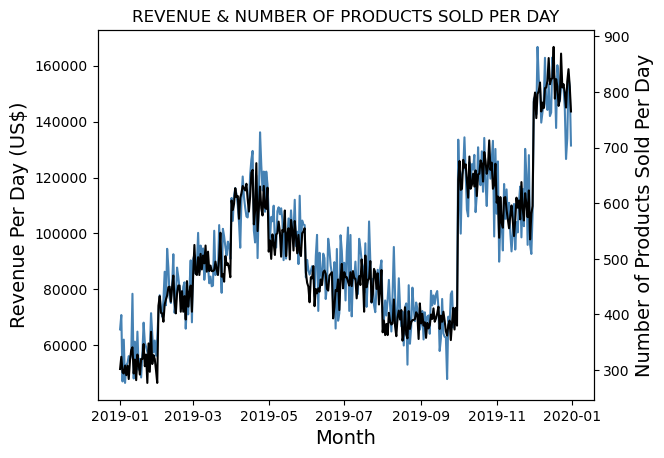

In [50]:
#lets now graph quantities sold per day and revenue per day for the year 2019 


#Define color to use
col1= "steelblue"
col2="black"

#define subplots
fig, ax = plt.subplots()

#add first line to plot 
ax.plot(rev_rel.index, rev_rel.Revenue, color=col1)

#add x-axis label
ax.set_xlabel("Month", fontsize = 14)

#add y-axis label
ax.set_ylabel("Revenue Per Day (US$)", fontsize = 14)

#Define second y-axis that shares x-axis with current plot\
ax2=ax.twinx()

#Add second line to plot 
ax2.plot(rev_rel.index, rev_rel.Product, color = col2)

ax2.set_ylabel("Number of Products Sold Per Day", color=col2, fontsize=14)

ax.set_title("REVENUE & NUMBER OF PRODUCTS SOLD PER DAY")

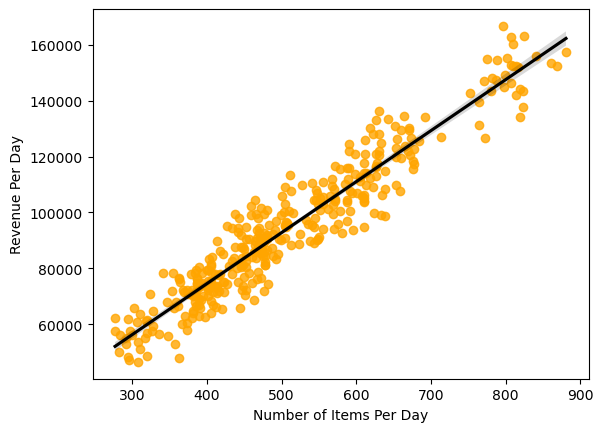

In [51]:
graph = sns.regplot(x="Product", y="Revenue", data=rev_rel,
                 scatter_kws={"color": "orange"}, line_kws={"color": "black"})
graph.set(xlabel= 'Number of Items Per Day', ylabel='Revenue Per Day')
plt.show()

In [52]:
#Lets use statsmodel to perform simple OLS Regression 

import statsmodels.api as sm

#define response variable
y = rev_rel['Revenue']

#define explanatory variable
x = rev_rel[['Product']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     3533.
Date:                Thu, 05 Jan 2023   Prob (F-statistic):          3.68e-189
Time:                        13:55:22   Log-Likelihood:                -3791.0
No. Observations:                 365   AIC:                             7586.
Df Residuals:                     363   BIC:                             7594.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1582.1586   1616.103      0.979      0.3

<b> From the model summary we can observe that the fitted regression equation is:

 R = 1582.1586 + 182.372*(P)
    
This means that each additional each additional unit of item sold is associated with an average increase in revenue of approximately US$ 182.372 whiles the intercept value of 1582.1586 tells us the average expected revenue when there is no transaction.

*Interpreting the model summary:*

<ul> 
<li> P>|t|:Since the p-value for number of products (0.000) is significantly less than .05, we can say that there is a statistically significant association between the number of products and revenue.
</li>

<li> R-squared: This number tells us the percentage of the variation in revenue can be explained by the number of products sold. In this case, 90.7% of the variation in revenue can be explained by the number of products sold.
</li>

<li> F-statistic & p-value: The F-statistic (63.91) and the corresponding p-value (2.25e-06) tell us the overall significance of the regression model, i.e. whether explanatory variables in the model are useful for explaining the variation in the response variable. Since the p-value in this example is less than .05, our model is statistically significant and number of product is deemed to be useful for explaining the variation in revenue.
</li>

</b>
        

In [53]:
#Lets now create a function that predicts revenue based on units of sold. 

def r(P):
    R = 1582.1586 + 182.372*(P)
    return(R)

#### Creating Residual Plots

<b> One of the key assumptions of linear regression is that the residuals of a regression model are roughly normally distributed and are homoscedastic at each level of the explanatory variable. If these assumptions are violated, then the results of our regression model could be misleading or unreliable.


To verify that these assumptions are met, we can create the following residual plots:

Residual vs. fitted values plot: This plot is useful for confirming homoscedasticity. 
The x-axis displays the fitted values and the y-axis displays the residuals. 
As long as the residuals appear to be randomly and evenly distributed throughout the chart around the value zero,
we can assume that homoscedasticity is not violated
</b>

eval_env: 1


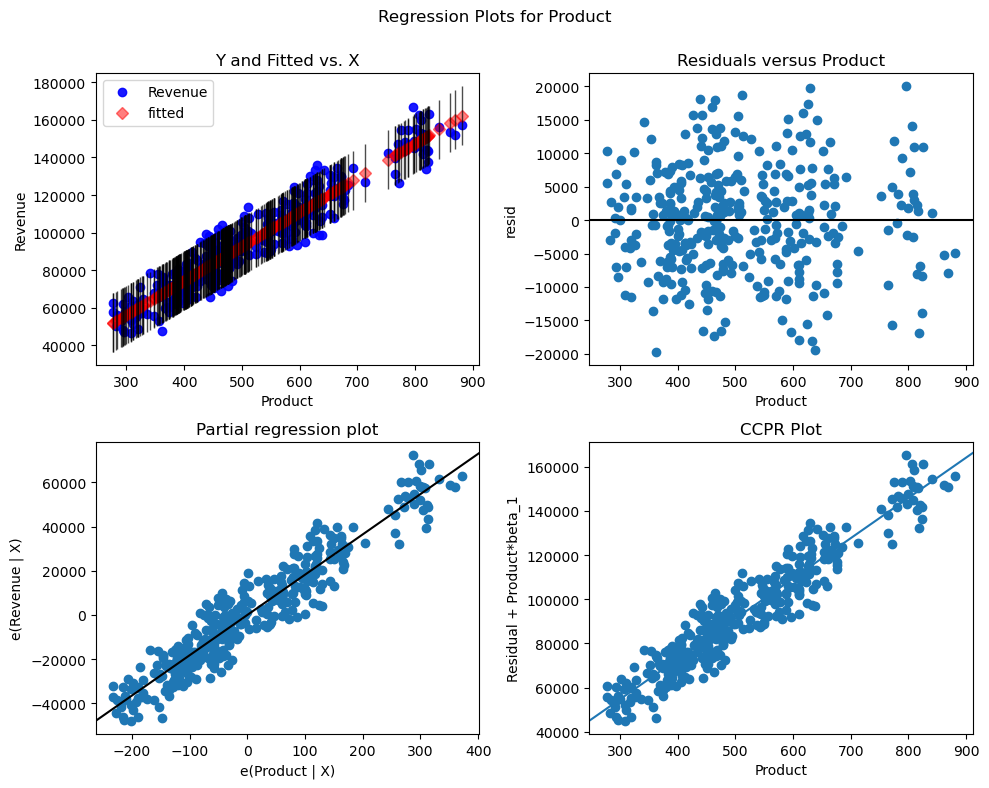

In [54]:
#define figure size
fig = plt.figure(figsize=(10,8))

#produce residual plots
fig = sm.graphics.plot_regress_exog(model, 'Product', fig=fig)
    

<b>Since the residuals appear to be randomly scattered around zero, this is an indication that heteroscedasticity 
is not a problem with the explanatory variable.</b>

### *Special Credit to Keith Galli for his inspiration and making available data for this project.*